In [47]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Load Data Viz Pkgs
import seaborn as sns

In [49]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [50]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [51]:
# Load Dataset
df = pd.read_csv('C:\\Users\\vanda\\OneDrive\\Desktop\\New folder\\Emotion Detection\\emotion_dataset_2.csv')

In [52]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [53]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

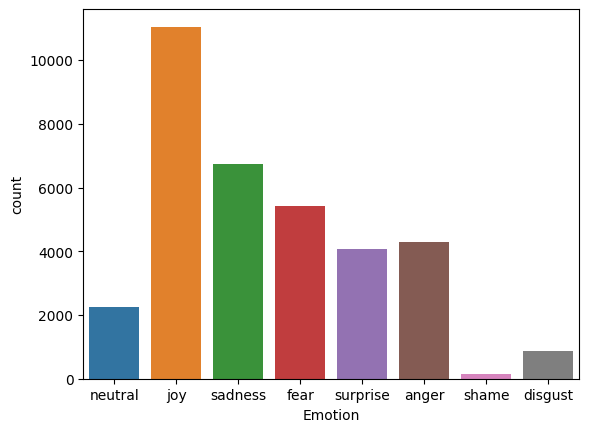

In [54]:
# Plot
sns.countplot(x='Emotion',data=df)

In [55]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [56]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [57]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [58]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,34789,anger,A man robbed me today .,man robbed today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [59]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [60]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [61]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [62]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [63]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [64]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [65]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.619946349875455

In [66]:
# Make A Prediction
ex1 = "I  kill you"

In [67]:
pipe_lr.predict([ex1])

array(['fear'], dtype=object)

In [68]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.20138066, 0.01757058, 0.21379654, 0.16457499, 0.12586784,
        0.19674654, 0.00262042, 0.07744243]])

In [69]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [70]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [71]:
#classification report(precision, recall, F1-score)
#Weighted average F1-score, Macro -average F1
#data cleaning
#oversampling (SMOTE)


In [72]:
y_pred = pipe_lr.predict(x_test)

In [73]:
# Assuming y_test is the actual data and y_pred is the predicted values
x = np.arange(len(y_test))  # X-axis values (can be indices or other values)
y_actual = y_test  # Actual data
y_predicted = y_pred  # Predicted values

In [74]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

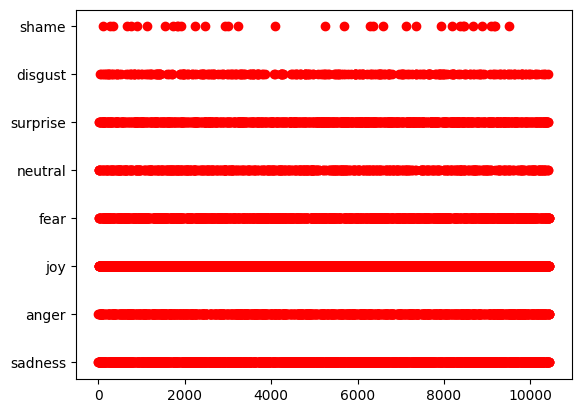

In [75]:
# Scatter plot of actual data
plt.scatter(x, y_actual, color='red', label='Actual')
plt.show()

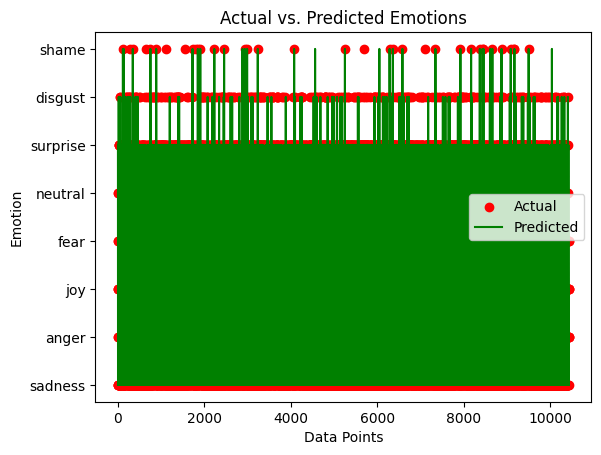

In [76]:
# Linear regression line for predicted values
plt.scatter(x, y_actual, color='red', label='Actual')

plt.plot(x, y_predicted, color='green', label='Predicted')

plt.xlabel('Data Points')
plt.ylabel('Emotion')
plt.title('Actual vs. Predicted Emotions')
plt.legend()
plt.show()

In [77]:
#confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=pipe_lr.classes_)
print(conf_matrix)

[[ 708    8   66  227   75  158    1   40]
 [  35   53   26   87    7   56    1   27]
 [  80    5 1069  237   39  137    0   78]
 [ 110    7  129 2468  130  293    1  173]
 [  16    1   12   93  492   53    0    8]
 [ 125    6   95  490   65 1146    2   86]
 [   1    0    1    4    1    1   28    0]
 [  58    5   46  399   25  140    1  507]]


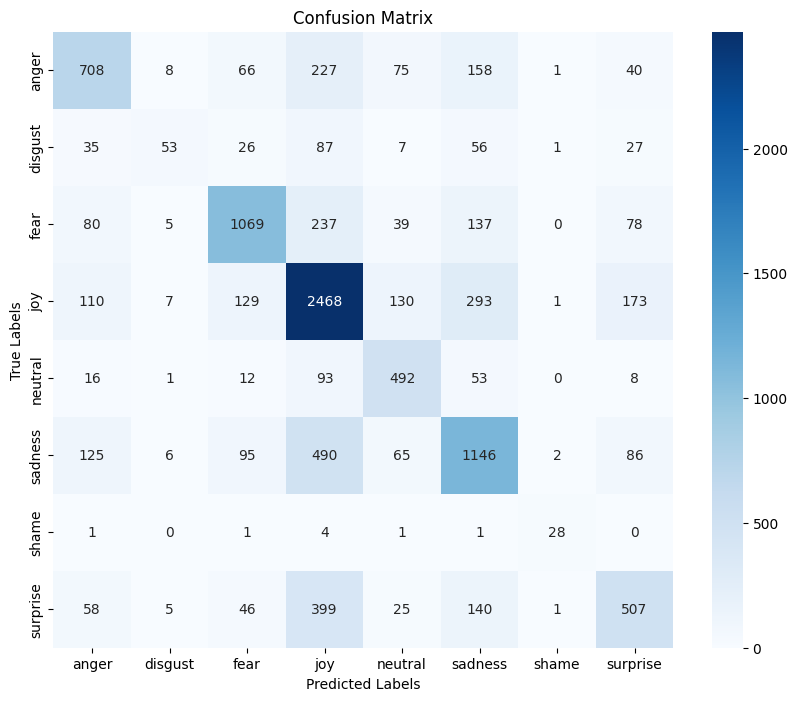

In [78]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=pipe_lr.classes_, yticklabels=pipe_lr.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [79]:
classification_rep = classification_report(y_test, y_pred, target_names=pipe_lr.classes_)
print(classification_rep)

              precision    recall  f1-score   support

       anger       0.62      0.55      0.59      1283
     disgust       0.62      0.18      0.28       292
        fear       0.74      0.65      0.69      1645
         joy       0.62      0.75      0.67      3311
     neutral       0.59      0.73      0.65       675
     sadness       0.58      0.57      0.57      2015
       shame       0.82      0.78      0.80        36
    surprise       0.55      0.43      0.48      1181

    accuracy                           0.62     10438
   macro avg       0.64      0.58      0.59     10438
weighted avg       0.62      0.62      0.61     10438



In [80]:
import re

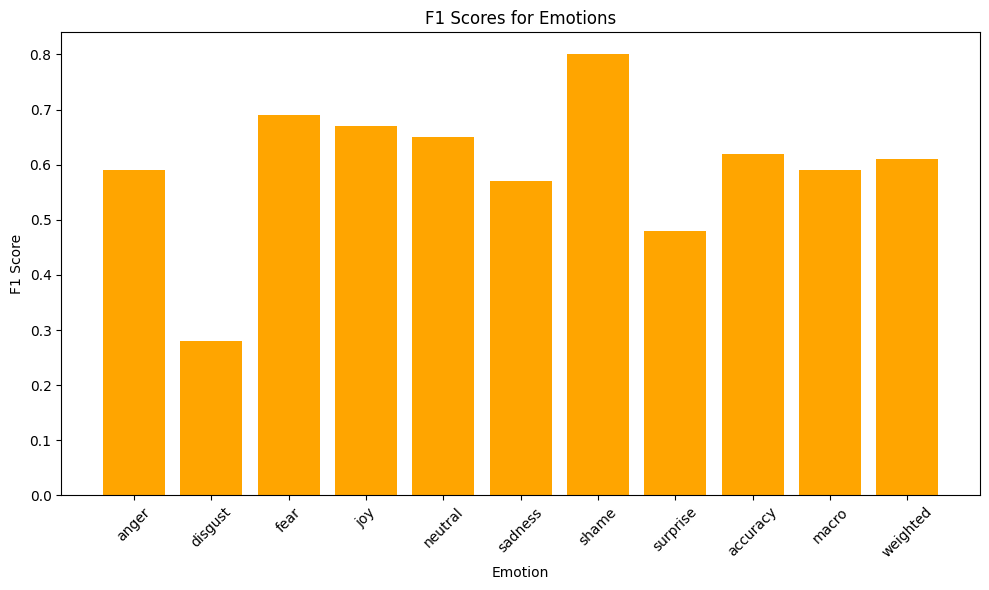

In [81]:
f1_scores = {}

# Parse the classification report to extract F1 scores
lines = classification_rep.split('\n')
for line in lines[2:]:
    parts = re.split(r'\s+', line.strip())
    if len(parts) < 2:
        continue
    emotion = parts[0]
    f1_score = float(parts[-2])
    f1_scores[emotion] = f1_score

# Plot the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='orange')
plt.xlabel('Emotion')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
# Predict on the training data
y_train_pred = pipe_lr.predict(x_train)

# Calculate accuracy for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Predict on the test data
y_test_pred = pipe_lr.predict(x_test)

# Calculate accuracy for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8934877227560154
Test Accuracy: 0.619946349875455


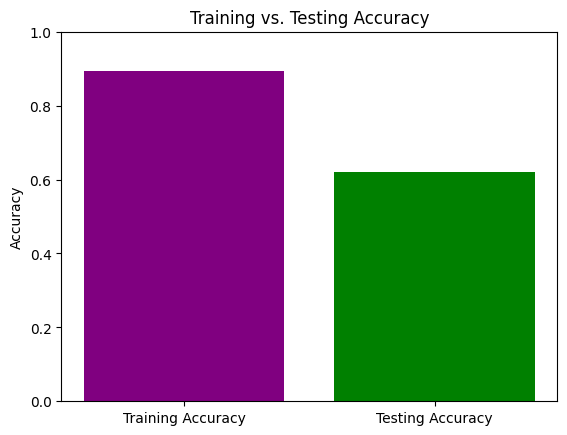

In [83]:
 # Calculate accuracy for training and testing data
y_train_pred = pipe_lr.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = pipe_lr.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create a bar plot
labels = ['Training Accuracy', 'Testing Accuracy']
accuracy_values = [train_accuracy, test_accuracy]

plt.bar(labels, accuracy_values, color=['purple', 'green'])
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1

plt.show()


In [84]:
#Enter Command in terminal to run this project in vs code 
#C:\Python311\python.exe -m streamlit run app.py
